In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import pandas as pd
from PIL import Image
from loguru import logger
from sklearn.model_selection import train_test_split

In [ ]:
DATASET_VERSION = "V3"
BASE_DIR = f"/mnt/disk/dataset/sentinel-ai-processor/{DATASET_VERSION}"
INPUT_DIR = os.path.join(BASE_DIR, "input")
TARGET_DIR = os.path.join(BASE_DIR, "output")

df_input = pd.read_csv(f"{BASE_DIR}/input_l1c.csv", index_col=0)
df_target = pd.read_csv(f"{BASE_DIR}/output_l2a.csv", index_col=0)

In [7]:
logger.info("L1C product {} ### Total:  {}".format(INPUT_DIR, len(df_input)))
logger.info("L2A product {} ### Total:  {}".format(TARGET_DIR, len(df_target)))

2025-04-18 14:06:41.586 | INFO     | __main__:<module>:1 - L1C product /mnt/disk/dataset/sentinel-ai-processor/V2/input ### Total:  17370
2025-04-18 14:06:41.588 | INFO     | __main__:<module>:2 - L2A product /mnt/disk/dataset/sentinel-ai-processor/V2/output ### Total:  17370


In [8]:
df_input.head(3)

,id_key,Name,S3Path,Footprint,GeoFootprint,cloud_cover
0,S2B_MSIL1C_20230101T102339_N0510_R065_T32TLR,S2B_MSIL1C_20230101T102339_N0510_R065_T32TLR_2...,/eodata/Sentinel-2/MSI/L1C_N0500/2023/01/01/S2...,geography'SRID=4326;POLYGON ((7.12879524023210...,"{'type': 'Polygon', 'coordinates': [[[7.128795...",56.141521
1,S2B_MSIL1C_20230101T102339_N0509_R065_T32UNV,S2B_MSIL1C_20230101T102339_N0509_R065_T32UNV_2...,/eodata/Sentinel-2/MSI/L1C/2023/01/01/S2B_MSIL...,geography'SRID=4326;POLYGON ((8.99972292255259...,"{'type': 'Polygon', 'coordinates': [[[8.999722...",99.997253
2,S2B_MSIL1C_20230101T102339_N0509_R065_T32TPT,S2B_MSIL1C_20230101T102339_N0509_R065_T32TPT_2...,/eodata/Sentinel-2/MSI/L1C/2023/01/01/S2B_MSIL...,geography'SRID=4326;POLYGON ((10.3366002199701...,"{'type': 'Polygon', 'coordinates': [[[10.33660...",39.047895


In [32]:
df_input['cloud_cover'][0]

56.1415210941367

In [33]:
df_target['cloud_cover'][0]

60.135943

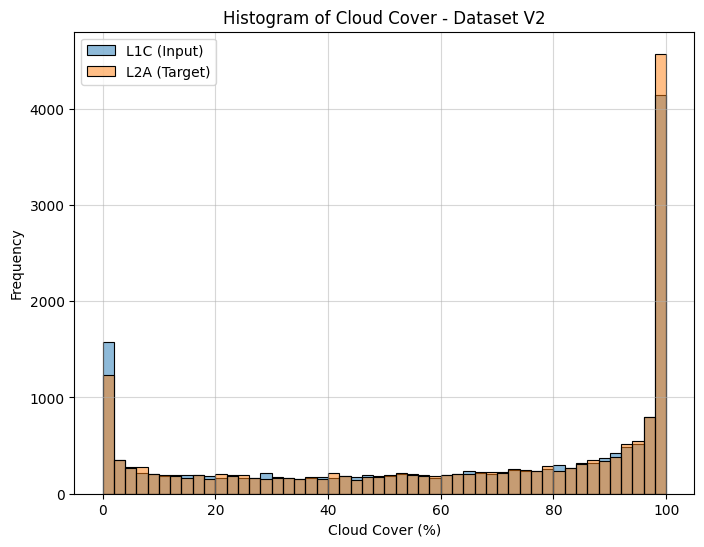

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histograms of cloud_cover
plt.figure(figsize=(8, 6))
sns.histplot(df_input['cloud_cover'], bins=50, label='L1C (Input)', alpha=0.5)
sns.histplot(df_target['cloud_cover'], bins=50,label='L2A (Target)', alpha=0.5)
plt.xlabel('Cloud Cover (%)')
plt.ylabel('Frequency')
plt.title(f'Histogram of Cloud Cover - Dataset {DATASET_VERSION}')
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()

In [37]:
df_target['cloud_cover'].std()

35.71871904564141

Original dataset sizes - Input: 17370, Target: 17370
Filtered dataset sizes - Input: 9067, Target: 9067
Number of samples removed: 8303


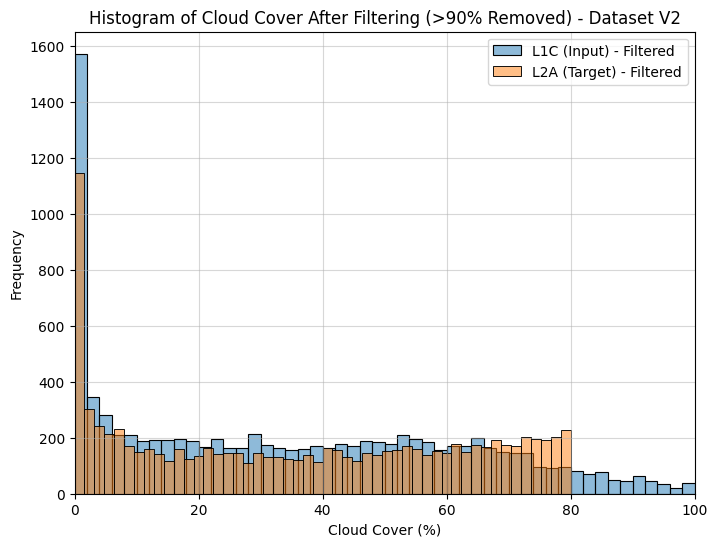

In [28]:
# Find indices where cloud_cover is > 90% in the target dataset
high_cloud_indices = df_target[df_target['cloud_cover'] > 80].index

# Remove those indices from both dataframes
df_input_filtered = df_input.drop(high_cloud_indices)
df_target_filtered = df_target.drop(high_cloud_indices)

# Verify the filtered datasets
print(f"Original dataset sizes - Input: {len(df_input)}, Target: {len(df_target)}")
print(f"Filtered dataset sizes - Input: {len(df_input_filtered)}, Target: {len(df_target_filtered)}")
print(f"Number of samples removed: {len(high_cloud_indices)}")

# Plot the new distributions
plt.figure(figsize=(8, 6))
sns.histplot(df_input_filtered['cloud_cover'], bins=50, label='L1C (Input) - Filtered', alpha=0.5)
sns.histplot(df_target_filtered['cloud_cover'], bins=50, label='L2A (Target) - Filtered', alpha=0.5)
plt.xlabel('Cloud Cover (%)')
plt.ylabel('Frequency')
plt.title(f'Histogram of Cloud Cover After Filtering (>90% Removed) - Dataset {DATASET_VERSION}')
plt.legend()
plt.grid(True, alpha=0.5)
plt.xlim(0, 100)
plt.show()

In [29]:
len(df_target_filtered)

9067

In [30]:
len(df_input_filtered)

9067

In [35]:
df_input['S3Path'][0]

'/eodata/Sentinel-2/MSI/L1C_N0500/2023/01/01/S2B_MSIL1C_20230101T102339_N0510_R065_T32TLR_20240806T191302.SAFE'